This project is to utilize Python for data manipulation, data preparation, visualization for EDA Analysis, applying clustering techniques to group customers based on their profiles, enabling the tailoring of marketing strategies and services. It provides an efficient method for organizing and managing the company’s customer relationships, ultimately boosting customer loyalty and conversions.
The objective of the project is to enhance the understanding of clustering algorithms and their practical applications in real-world scenarios.

Three main parts are included;
<hr>
<blockquote>
    <ul>
    <li> <b>Part A: Data Cleaning and Manipulation </li>
    <li> <b>Part B: Exploratory Data Analysis (EDA) </li>
    <li> <b>Part C: Clustering Analysis (K-means clustering algorithm) </li>

# Part A: Data Cleaning and Manipulation

Part A highlights the importance of systematic data preparation because this is the foundation for reliable and accurate analysis. 

### As key learning outcomes through this project, 
<ul>
    <li>Understanding the structure and data type of raw data through initial data analysis,</li> 
    <li>Implementing appropriate imputation techniques to handle missing values based on the data distribution,</li> 
    <li>Identifying and addressing outliers using both statistical (IQR) and algorithmic (Isolation Forest) approach and implement appropriate treatment to outliers.</li> 
    <li>Leveraging feature engineering to create meaningful variables that will add value to the original dataset.</li> 
    <li>Importance of data standardization in making the dataset more useful in clustering and machine learning tasks that will be carried out in Part C.</li> 
<ul>

**Data Preprocessing**

**Step 1: Setup and Initialization**

In [60]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import the libraries
import pandas as pd # data processing, data manipulation
import numpy as np # linear algebra
from datetime import datetime

**Step 2: Read the dataset**

In [41]:
file_path = '/Users/zinpwint/Desktop/Portfolio Projects/Python/Jupyter_Clustering Analysis on Customer Profiles_Kmeans Clustering/AIB503_ECA01_Z2471556_ZinPwintPhyu_04Nov2024/Raw data and python codes/Clustering_data.csv'

Note: Read the dataset specifying the delimiter as '\t' to handle tab-separated values

In [19]:
data = pd.read_csv(file_path, delimiter='\t', encoding='utf-8')

**Step 3: Initial Data Analysis**

In [42]:
print (data.head(5))

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

To have a preliminary understanding about the dataset, I explored the data types of columns and data structures in the dataset. The csv dataset originally contains 2,240 entries and 29 columns with a mix of (25) integer, (1) float, and (3) objects data types. 
The dataset includes the data about the customers, their demographics, spending on different products, purchase behavior, interactions with company’s marketing campaigns. The breakdown of the data attributes can be seen as below. 

**Demographic data**: ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency. 

**Spending on Different Product Categories (Over Last 2 Years)**: MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds.

**Purchase Behavior**: NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

**Campaign Responses and Complaints**: AcceptedCmp1 to AcceptedCmp5, Complain, Response.

In [43]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

From this overview of dataset, I found that there are missing values in ‘Income’ columns as only 2,216 observations have been detected in that column while the rest columns have 2,240 observations. ‘Dt_Customer’ column must be in datetime format, that is easier for further time series analysis. 

**Step 4: Initial Descriptive analysis**

I generated a summary descriptive analysis to gain the initial understanding of the data distribution for each column. 

In [44]:
descriptive_analysis = data.describe ().T
print (descriptive_analysis)

# Check including 'object' columns 

descriptive_analysis_obj = data.describe (include = 'object')
print (descriptive_analysis_obj)

                      count                           mean  \
ID                   2240.0                    5592.159821   
Year_Birth           2240.0                    1968.805804   
Income               2240.0                   52237.975446   
Kidhome              2240.0                       0.444196   
Teenhome             2240.0                        0.50625   
Dt_Customer            2240  2013-07-10 10:01:42.857142784   
Recency              2240.0                      49.109375   
MntWines             2240.0                     303.935714   
MntFruits            2240.0                      26.302232   
MntMeatProducts      2240.0                         166.95   
MntFishProducts      2240.0                      37.525446   
MntSweetProducts     2240.0                      27.062946   
MntGoldProds         2240.0                      44.021875   
NumDealsPurchases    2240.0                          2.325   
NumWebPurchases      2240.0                       4.084821   
NumCatal

Mean, standard deviation and minimum, maximum and different portion of the dataset can be seen for each feature. The detail exploration and cleaning will carry out in the next step. I found out that Z_CostContact and Z_Revenue columns does not have value added information in the dataset, I will ignore this two extra columns in the other steps. 

**Step 5: Data Cleaning and Transformation**

In this step, I will focus on data cleaning and transformation process to refine the dataset. It means, checking duplicates, handling missing values, handling outliers and other necessary adjustments will be included to prepare the data for in depth analysis and modeling for the remaining questions. 

**Step 5.1: Checking Duplicates**

In [45]:
print (data [data.duplicated(keep=False)])

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


No duplicated values are found in the dataset. 

**Step 5.2: Handling Missing Values**

In [46]:
missing_values = data.isnull().sum(axis=0)
print (missing_values)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In the earlier step, I already found out that ‘Income’ has some missing values I need to address. 24 empty entries are found under ‘Income’ columns. Before deciding how to handle the missing value in ‘Income’ column, I decided to plot the distribution of the 'Income' column to decide which imputation method I should use.

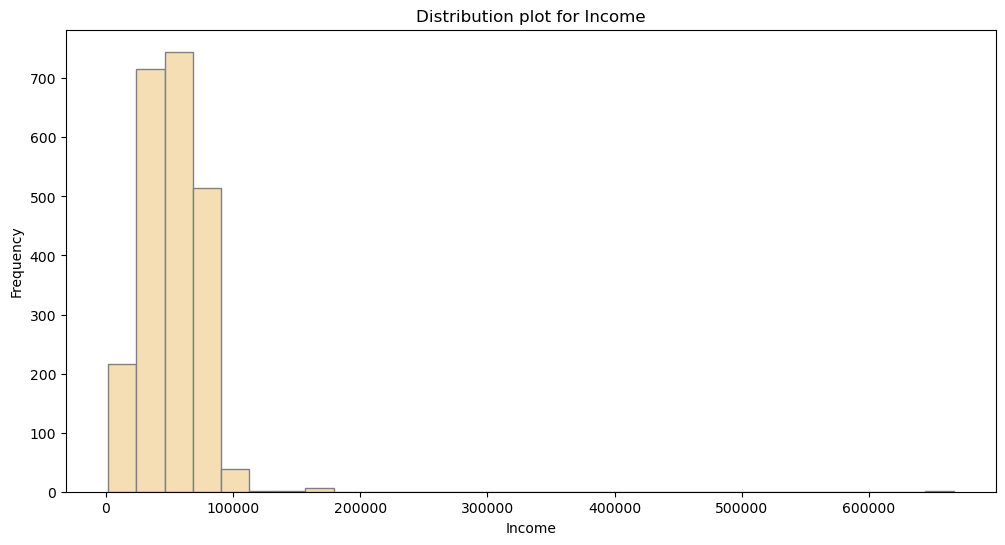

In [47]:
# Plotting the distribution of the 'Income' column 
plt.figure(figsize=(12,6))
plt.hist(data['Income'].dropna(), bins = 30, color = 'wheat', edgecolor= 'grey')
plt.title('Distribution plot for Income')
plt.xlabel('Income')
plt.ylabel('Frequency') 
plt.grid(False)
plt.show()  

According to the above figure, I found that it is right-skewed, with most values concentrated between 0 and 100,000. In this case, using the median to fill the missing values is preferred because it is less affected by extreme values (outliers) compared to the mean. 

In [48]:
# Proceed to imputate the missing values with 'Median' value for Income Column 
median_income = data['Income'].median()

# Replace the 'median' value in the missing values of Income column 
data['Income'].fillna(median_income, inplace = True)

# Check again if there is any remaining missing values in the dataset
data.isnull().sum(axis=0)

# No more missing values, especially in 'Income' column. 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

**Step 5.3: Identify the garbage values in 'object' columns**

In [49]:
for i in data.select_dtypes(include="object").columns:
    print (data [i]. value_counts())
    print ("***"*10)

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
******************************
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Other         7
Name: count, dtype: int64
******************************


I observed that the education level is dominated by 'Graduation' with 1,127 entries and 'PhD' with 486 entries, and marital status is mostly contributed by ‘Married’ (864 entries) and ‘Together’ (580 entries). However, there are some uncommon entries under marital status such as 'Alone', 'Absurd', 'YOLO'. Those might be the errors from data entry or data collection. So, I will replace those entries as 'Other' category under 'marital status'. Moreover, the Dt_customer columns should be the datetime format, I will modify that. 

In [50]:
# To Clean the 'Marital_Status' column
# Replace 'Alone', 'Absurd' and 'YOLO' with 'Other'
data['Marital_Status'] = data['Marital_Status'].replace(['Alone','Absurd', 'YOLO'], 'Other')

In [32]:
# Verify the cleaning
print(data['Marital_Status'].value_counts())

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Other         7
Name: count, dtype: int64


In [33]:
# Convert 'Dt_Customer' column to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [34]:
# Verify the conversion
print(data['Dt_Customer'].head())

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


**Step 6: Feature Engineering**

Before starting any major modification in the dataset, it is a good practice to make a copy of the original dataset and perform all modifications on the copied version. By preserving the original dataset, I can always have access to the raw data to revisit or validate the analysis and apply different data preprocessing or analysis techniques.

In [38]:
data_features = data.copy()

To create a comprehensive dataset to enhance the quality of analysis and modeling, several feature engineering processes can be done based on the available given dataset. So, I added below eight columns during the features engineering process. 

1.	Customer_Age: Calculated the customer’s current age from Year_Birth column, making it easier to segment customers based on age.
2.	Customer_tenure: Derived the number of months since the customer enrolled with the company by using Dt_Customer column.
3.	Family_size: Calculated the family size by adding Kidhome, Teenhome, and assuming two adults. So that, the spending and purchase behaviours can be analysed based on the family size. 
4.	Total_spending: Sum up all the spending columns (MntWines, MntFruits, etc.) to get the customer’s total spending in the last two years.
5.	Average Spending per Purchase: Average spending per purchase across all categories is calculated by dividing Total_Spending by the total purchases (sum of NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases).
6.	Campaign Acceptance Rate: Calculated the percentage of campaigns a customer has accepted to understand their responsiveness to marketing by using AcceptedCmp1 to 5. 
7.	Preferred Purchase Channel: Find out the customer’s most common purchase channel based on the highest value among NumWebPurchases, NumCatalogPurchases, and NumStorePurchases.
8.	Complaint Response Interaction: Check if customers who complained were more likely to respond to the most recent campaign by creating an interaction feature.

In [39]:
# Step 6.1: Find the customer age 

data_features['Customer_Age'] = datetime.now().year - data_features['Year_Birth']

# Step 6.2: Calculate 'Customer_tenure' 

data_features['Customer_tenure'] = (pd.Timestamp('today') - data_features['Dt_Customer']).dt.days//30

# Step 6.3: Calculate 'Family Size'

data_features['Family_size'] = data_features['Kidhome'] + data_features['Teenhome'] + 2 #Generally assuming 2 adults at home

# Step 6.4: Calculate 'Total Spending in last two years'

data_features['Total_spending'] = data_features[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [39]:
# Step 6.5: Calculate Average Spending per Purchase

data_features['Total_purchase'] = data_features[['NumDealsPurchases', 'NumWebPurchases', 
                                'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

data_features['Avg_spending/purchase'] = data_features['Total_spending'] / data_features['Total_purchase']

# Step 6.6: Campaign acceptance rate

campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
data_features['Campaign_Acceptance_Rate'] = data_features[campaign_cols].mean(axis=1)

# Step 6.7: Preferred Purchase Channel

data_features['Preferred_Purchase_Channel'] = data_features[['NumWebPurchases', 'NumCatalogPurchases', 
                                                             'NumStorePurchases']].idxmax(axis=1)

# Step 6.8: Complaint Response Interaction

data_features['Complaint_Response_Interaction'] = data_features['Complain'] * data_features['Response']

These newly created features can help refine customer segmentation, identify high-value customers, and create insightful variables for predictive modeling or clustering analysis.

**Step 7: Outliers Detection and Treatment**

**Step 7.1: IQR Outlier Detection and Handling**

It is tricky to handle the outliers in this beginning step because one of the objectives of the assignment is to design K-means clustering in Q1b for customer segmentation based on their profile. Normally, in K-means clustering, the algorithm is sensitive to both the scale of data and the presence of outliers, as they can significantly influence the position of centroids, potentially leading to incorrect cluster assignments. So, I first detect the outliers by using the Interquartile Range (IQR) method. The results indicated the presence of outliers across several key variables as shown below. 

In [51]:
#Select only numeric columns and exclude the Derived Columns such as Campaign Acceptance Rate

columns = data_features.select_dtypes(include="number").columns
columns = columns.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
                        'AcceptedCmp5', 'Campaign_Acceptance_Rate', 'Complain', 
                        'Z_CostContact', 'Z_Revenue', 'Response'])
    
# Define a function to calculate IQR and apply capping on outliers
def iqr_outlier_handling(data_features, columns):
    # Create a dictionary to store the outlier counts for each column
    outlier_counts = {}

    # Calculate IQR and handle outliers
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data_features[col].quantile(0.25)
        Q3 = data_features[col].quantile(0.75)
        IQR = Q3 - Q1  # Calculate IQR

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the outliers before capping for record-keeping
        outliers = data_features[(data_features[col] < lower_bound) | (data_features[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
        
        # Cap the outliers
        data_features[col] = data_features[col].clip(lower=lower_bound, upper=upper_bound)
        
    return data_features, outlier_counts

In [52]:
# Apply the IQR outlier handling to the dataset's numeric columns
data_iqr_handled, outlier_counts = iqr_outlier_handling(data_features, columns)

# Display the number of outliers detected per column
print("Outliers detected per column before capping:")
print(outlier_counts)

Outliers detected per column before capping:
{'ID': 0, 'Year_Birth': 3, 'Income': 8, 'Kidhome': 0, 'Teenhome': 0, 'Recency': 0, 'MntWines': 35, 'MntFruits': 227, 'MntMeatProducts': 175, 'MntFishProducts': 223, 'MntSweetProducts': 248, 'MntGoldProds': 207, 'NumDealsPurchases': 86, 'NumWebPurchases': 4, 'NumCatalogPurchases': 23, 'NumStorePurchases': 0, 'NumWebVisitsMonth': 8, 'Customer_Age': 3, 'Customer_tenure': 0, 'Family_size': 53, 'Total_spending': 3, 'Total_purchase': 2, 'Avg_spending/purchase': 101, 'Complaint_Response_Interaction': 3}


The column ‘Year_Birth’ and many of monetary columns such as Income, amount spending on different products has outliers, I will use use the **Isolation Forest algorithm** to detect the outliers by randomly selecting a feature from a given sets of features and then, randomly choose a split value between the max and min values of the features. 

After applying the Isolation Forest algorithm, I have identified the outliers and marked them in a new column named Is_Outlier. I have also calculated the outlier scores which represent the outlier score of each record. Now I will visualize the distribution of these scores and the number of inliers and outliers detected by the model.

In [56]:
# Step 7.2: Outlier treatment
# Select only numeric columns

numeric_data = data_features.select_dtypes(include=['number'])

# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
data_features['Outlier_Scores'] = model.fit_predict(numeric_data.to_numpy())
# -1 indicates an outlier, 1 indicates an inlier

# Creating a new column to identify outliers 
data_features['Is_Outlier'] = [1 if x == -1 else 0 for x in data_features['Outlier_Scores']]

# Display the first few rows of the data_features dataframe
data_features.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Customer_tenure,Family_size,Total_spending,Total_purchase,Avg_spending/purchase,Campaign_Acceptance_Rate,Preferred_Purchase_Channel,Complaint_Response_Interaction,Outlier_Scores,Is_Outlier
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,150,2.0,1617.0,25.0,64.680000,0.0,NumCatalogPurchases,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,131,4.0,27.0,6.0,4.500000,0.0,NumStorePurchases,0,1,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,138,2.0,776.0,21.0,36.952381,0.0,NumStorePurchases,0,1,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,132,3.0,53.0,8.0,6.625000,0.0,NumStorePurchases,0,1,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,133,3.0,422.0,19.0,22.210526,0.0,NumStorePurchases,0,1,0


After applying the Isolation Forest algorithm, I have identified the outliers and marked them in a new column named Is_Outlier. I have also calculated the outlier scores which represent the anomaly score of each record.
Now I will visualize the distribution of these scores and the number of inliers and outliers detected by the model. 

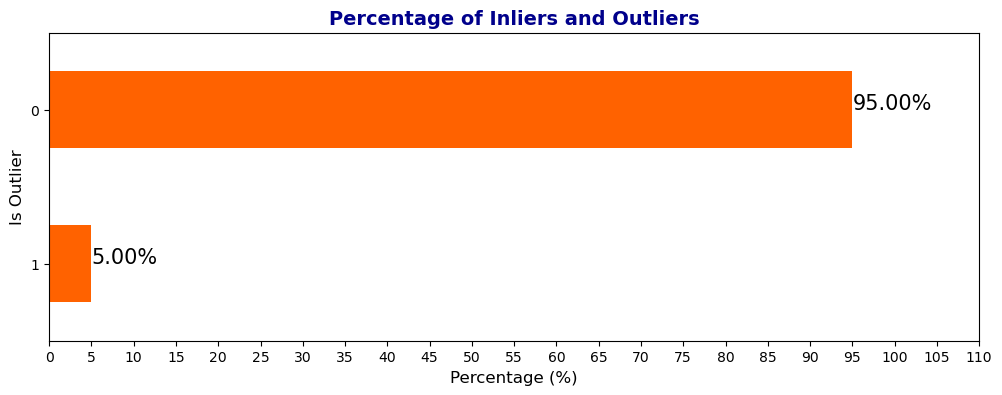

In [54]:
# Calculate the percentage of inliers and outliers
outlier_percentage = data_features['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Is Outlier', fontsize=12)
plt.grid(False)
plt.gca().invert_yaxis()
plt.show()

From the above plot, I observed that around 5% of the customers are identified as outliers in the dataset. This percentage seems to be reasonable enough to remove those outliers from main dataset, as they are not too high to lose a significant amount of data, and not too small to retain potentially noisy data points. So, I separated those outliers as a separate data frame and remove them from the main dataset which I will be using for the clustering analysis. As a result, 2,128 entries remain in the updated dataset. 

In [61]:
# Step 7.3: Removing Outliers

# Separate the outliers for analysis
outliers_data = data_features[data_features['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
data_features_cleaned = data_features[data_features['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
data_features_cleaned = data_features_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
data_features_cleaned.reset_index(drop=True, inplace=True)

# Getting the number of rows in the cleaned customer dataset
data_features_cleaned.shape[0]

2128

**Step 8: Data Standardization**

Before performing clustering in Part C, firstly, it is important to standardize the data to have mean 0 and variance 1 in the numeric features which I might need to use in the clustering later. I selected some numeric columns to standardize as some of the columns are already in binary variables, such as AcceptedCmp1 to 5, etc. I used StandardScaler and fit the dataset for the selected columns as below. Then, I saved this scaled data separately as ‘data_scaled’.


In [59]:
# Initialize the StandardScaler 
scaler = StandardScaler()

# Selecting columns to standardize
columns_to_scale = ['Year_Birth','Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Age', 
                    'Total_spending','Total_purchase']

# Apply scaling only on the selected columns and create a DataFrame with scaled data
data_scaled = pd.DataFrame(scaler.fit_transform(data_features_cleaned[columns_to_scale]), columns=columns_to_scale)

# Display the first few rows and info of the scaled data
print(data_scaled.head())
print(data_scaled.info())

   Year_Birth    Income   Recency  MntWines  MntFruits  MntMeatProducts  \
0   -1.022607  0.391428  0.308374  1.192408   2.263200         2.385822   
1   -1.281555 -0.196007 -0.384536 -0.861560  -0.732137        -0.778371   
2   -0.332081  1.062591 -0.800282  0.504460   1.065065        -0.069357   
3    1.307920 -1.177125 -0.800282 -0.861560  -0.619812        -0.696336   
4    1.048973  0.399149  1.555613 -0.328319   0.840415        -0.122094   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         2.287318          2.257087      1.282195           0.478918   
1        -0.720329         -0.733112     -0.816758          -0.172288   
2         2.046199          0.014438      0.104734          -0.823494   
3        -0.517281         -0.658357     -0.842355          -0.172288   
4         0.396435          0.238703     -0.586385           1.781330   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0         1.528851           